In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import plot_importance

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)

In [42]:
df_raw = pd.read_csv('features.csv').drop(['Sex','Age', 'Species', 'Call'], axis=1)
df_raw

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS
0,Acinonyx_jubatus_S0612_02,1,706,0.083313,0.015951,848.000000,263.000000,-3.270038,1526.165771,0.101744,18.307605,0.734437,0.117970,-0.008915,2,0.019846
1,Acinonyx_jubatus_S0612_02,4,3456,0.296424,0.035485,3645.500000,452.250000,-2.419156,1377.502653,0.625990,18.523777,0.682254,0.112089,-0.009319,21,0.043695
2,Acinonyx_jubatus_S0612_02,5,2984,0.171860,0.022913,2181.800000,308.000000,-2.863807,1011.861165,0.214492,18.676903,0.664394,0.211802,0.006031,8,0.028763
3,Acinonyx_jubatus_S0612_02,5,3108,0.243933,0.023587,3437.000000,314.000000,-3.096756,1207.803345,0.279397,18.298732,0.731459,0.147876,0.003965,11,0.028987
4,Acinonyx_jubatus_S0612_02,3,1919,0.194653,0.029304,2189.000000,331.000000,-2.780607,942.326097,0.370894,18.787422,0.632496,0.193519,0.001523,5,0.037000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Lion Roaring Sequence_17,40,22436,0.652970,0.073732,10092.625000,295.250000,-4.387553,1458.415228,3.050521,20.184006,0.580697,0.190296,-0.000172,85,0.088674
602,Lion Roaring Sequence_18,45,127303,1.039453,0.117559,10681.044444,1159.066667,-5.522057,4116.969550,12.378446,20.695561,0.593314,0.184751,0.001714,139,0.141392
603,Lion Roaring Sequence_18,17,32072,1.021872,0.181167,10494.470588,898.411765,-3.991339,3033.963691,24.540840,20.218510,0.616647,0.182995,-0.004780,98,0.219604
604,Lion Roaring Sequence_19,19,23112,0.747216,0.123384,5462.315789,315.631579,-5.297592,2002.811373,9.278934,21.174380,0.515771,0.224227,0.006657,38,0.142555


In [43]:
df = pd.read_csv('features_cleaned2.csv')
df

,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Sex,Age,Species,Call
0,Acinonyx_jubatus_S0612_02,-0.605682,-0.601727,-0.652219,-0.302150,-1.253581,-0.627236,0.821527,-1.137651,-0.238886,-0.135234,0.330343,-0.822152,-0.922610,-0.424178,-0.316481,Unknown,Adult,A. jubatus,growl
1,Acinonyx_jubatus_S0612_02,-0.218505,-0.430594,0.216786,0.373251,-0.399175,-0.335683,1.097614,-1.213548,-0.057318,0.016933,-0.257340,-0.923002,-0.954407,0.291424,0.336062,Unknown,Adult,A. jubatus,NaN
2,Acinonyx_jubatus_S0612_02,-0.089447,-0.459967,-0.291151,-0.061413,-0.846215,-0.557911,0.953337,-1.400217,-0.199837,0.124721,-0.458477,0.787031,0.254189,-0.198198,-0.072508,Unknown,Adult,A. jubatus,growl
3,Acinonyx_jubatus_S0612_02,-0.089447,-0.452250,0.002743,-0.038130,-0.462855,-0.548667,0.877752,-1.300183,-0.177357,-0.141480,0.296804,-0.309274,0.091535,-0.085208,-0.066355,Unknown,Adult,A. jubatus,NaN
4,Acinonyx_jubatus_S0612_02,-0.347564,-0.526242,-0.198208,0.159550,-0.844016,-0.522477,0.980334,-1.435716,-0.145668,0.202517,-0.817708,0.473492,-0.100777,-0.311188,0.152876,Unknown,Adult,A. jubatus,growl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Lion Roaring Sequence_17,4.427611,0.750531,1.670677,1.695678,1.569890,-0.577553,0.458927,-1.172240,0.782396,1.185597,-1.401070,0.418225,-0.234203,2.701873,1.566768,Male,Adult,Lion,roar
602,Lion Roaring Sequence_18,5.072905,7.276403,3.246647,3.211052,1.749604,0.753217,0.090813,0.185017,4.013036,1.545689,-1.258973,0.323122,-0.085715,4.735690,3.009221,Male,Adult,Lion,roar
603,Lion Roaring Sequence_18,1.459259,1.350179,3.174955,5.410373,1.692621,0.351660,0.587486,-0.367884,8.225368,1.209885,-0.996199,0.293001,-0.597020,3.191496,5.149242,Male,Adult,Lion,roar
604,Lion Roaring Sequence_19,1.717376,0.792598,2.054986,3.412455,0.155712,-0.546154,0.163645,-0.894312,2.939548,1.882738,-2.132262,1.000131,0.303535,0.931700,3.041052,Male,Adult,Lion,roar


In [44]:
df.shape

(606, 20)

In [45]:
df = df[df.Species.isin(['Clouded leopard','Snow leopard', 'Jaguar','Leopard','Lion'])]

In [46]:
df.shape

(143, 20)

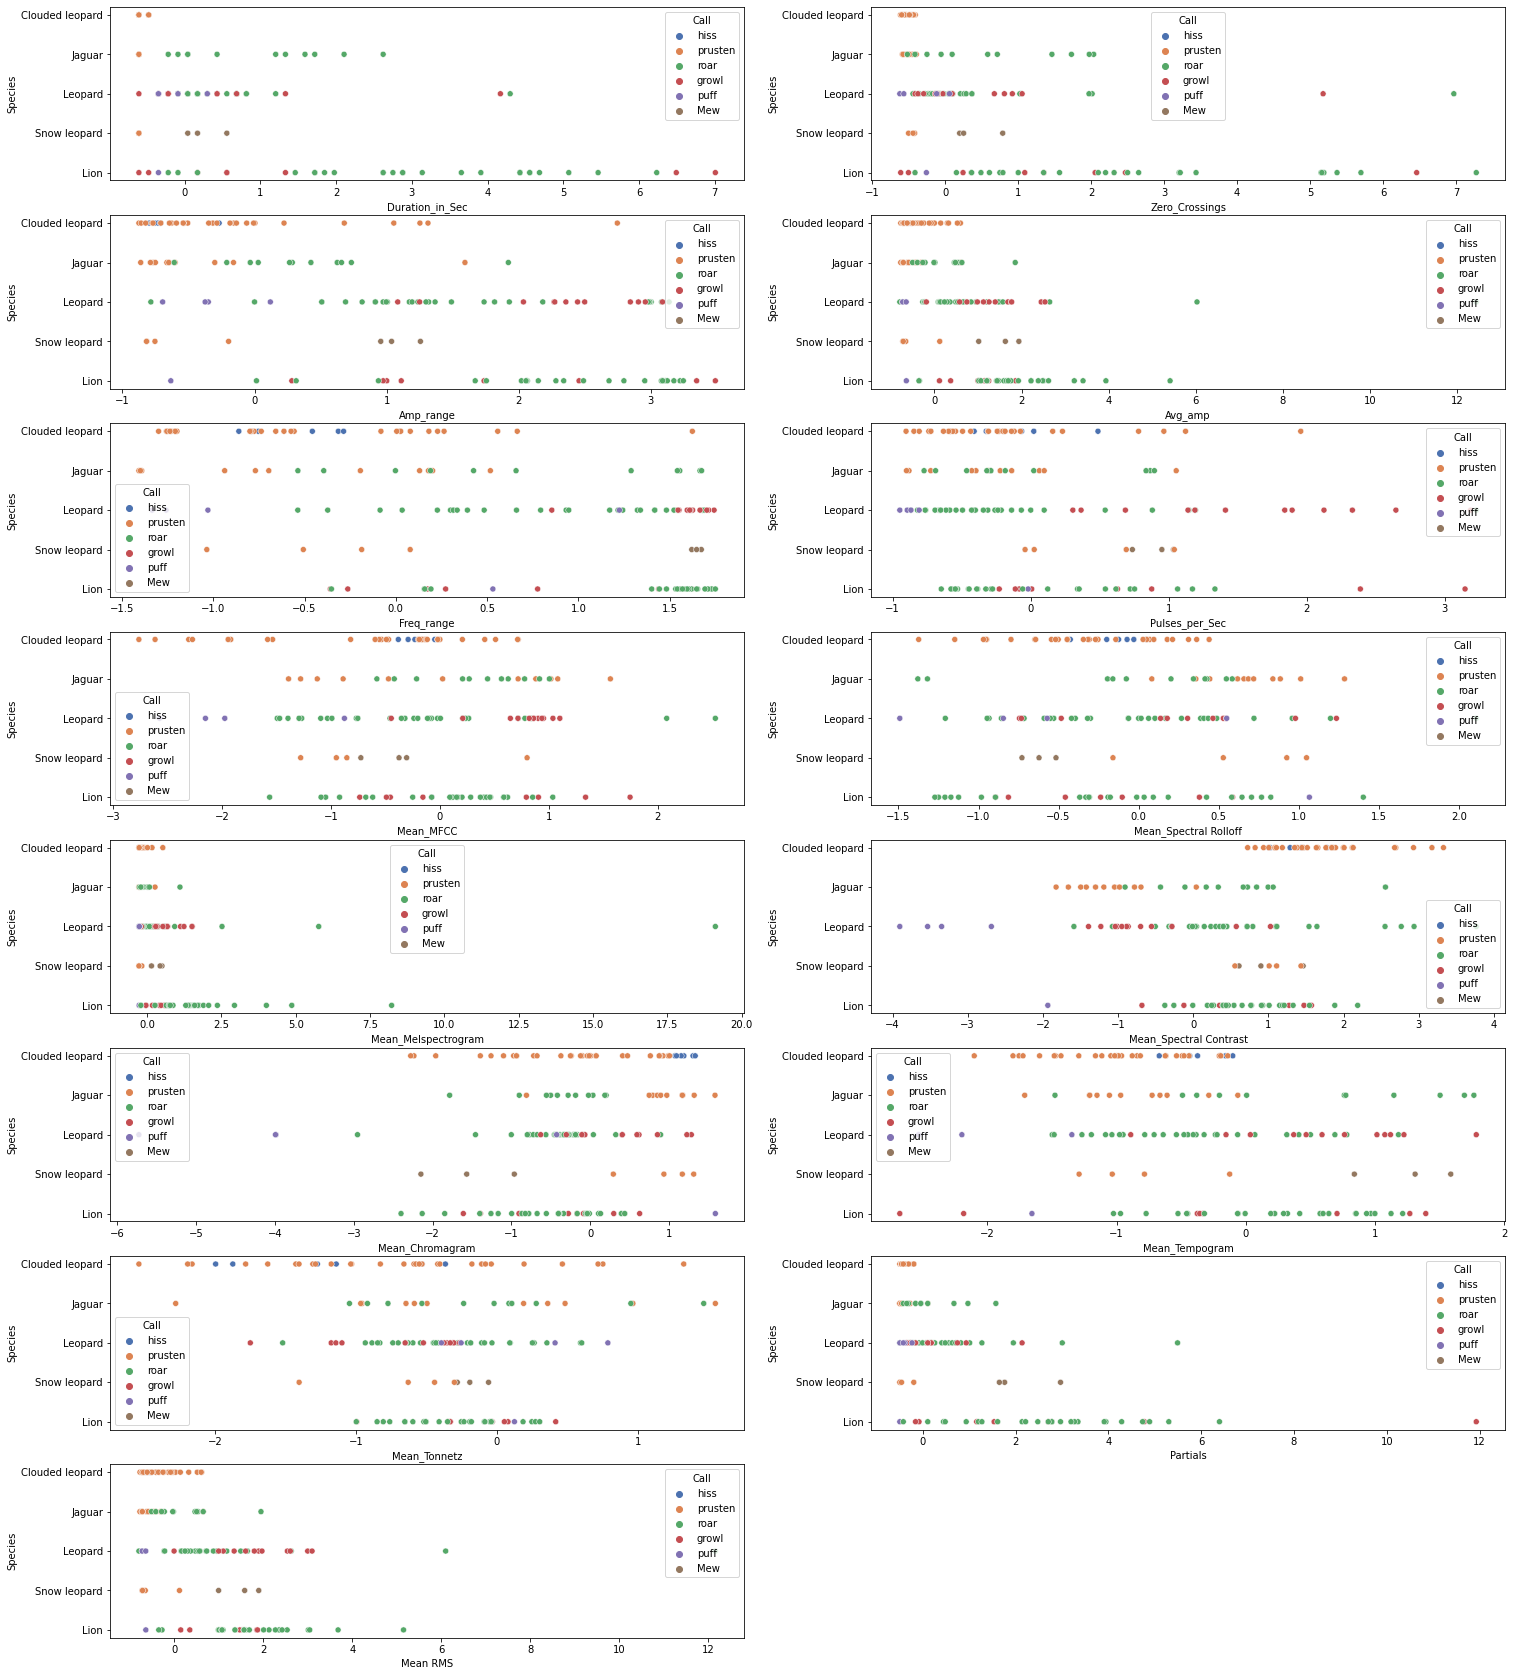

In [47]:
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Species'], hue=df['Call'], legend='brief', palette='deep') 
plt.savefig('Species Clusters By Features.pdf')
plt.show()

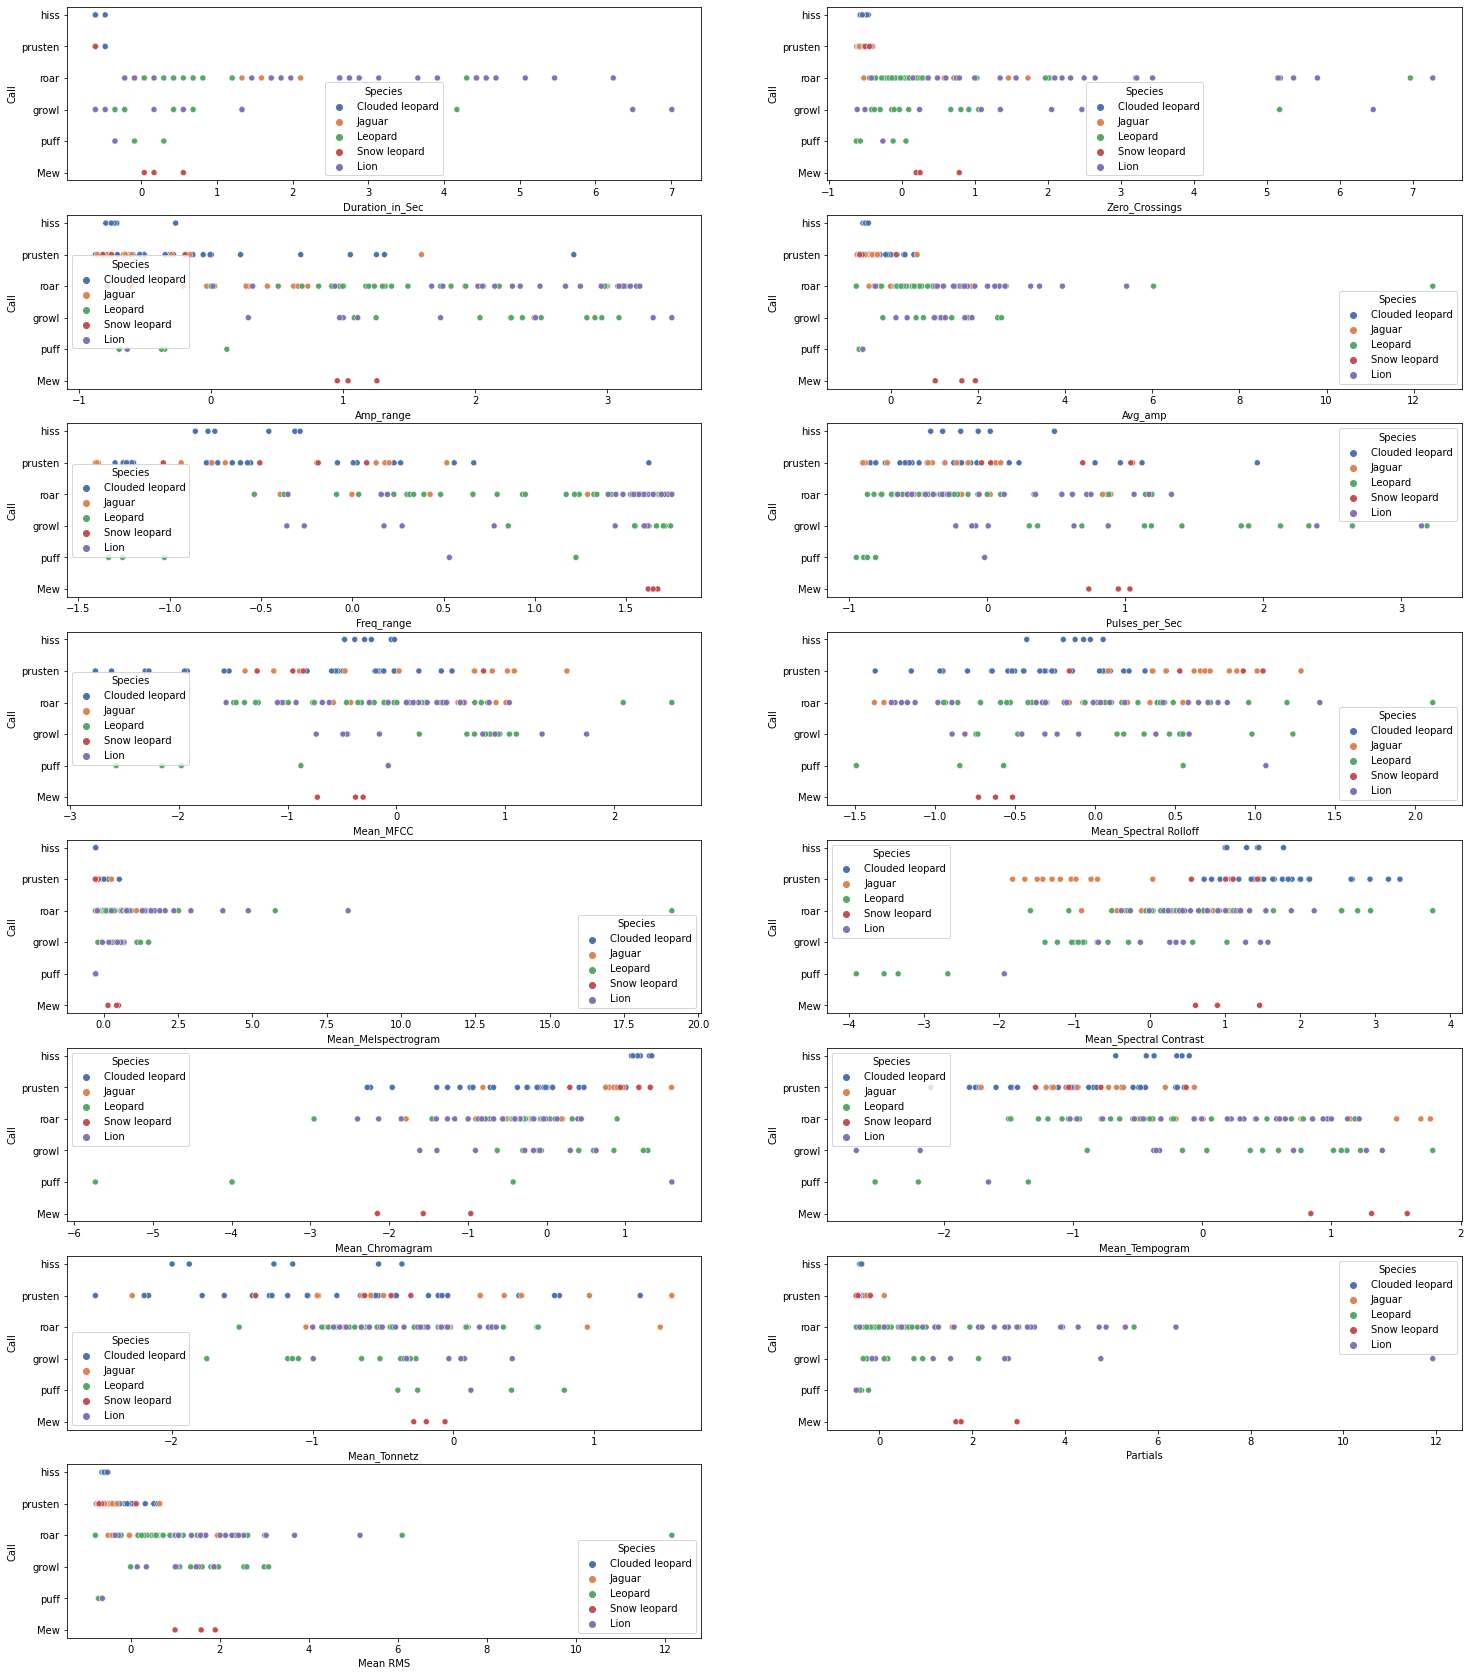

In [48]:
l= ['Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials','Mean RMS']

plt.figure(figsize=(25,30))
for i in range(len(l)):
    plt.subplot(8,2,i+1)
    sns.scatterplot(df[l[i]], df['Call'], hue=df['Species'], legend='brief', palette='deep') 
plt.savefig('Call Clusters By Features.pdf')
plt.show()

In [49]:
df.columns

Index(['File Name', 'Duration_in_Sec', 'Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram',
       'Mean_Tonnetz', 'Partials', 'Mean RMS', 'Sex', 'Age', 'Species',
       'Call'],
      dtype='object')

In [50]:
X = df[pd.notnull(df['Call'])][['Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram','Mean RMS']]
y = df[pd.notnull(df['Call'])][['Call','Species']]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

In [52]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(100, 12)
(43, 12)
(100, 2)
(43, 2)


In [53]:
print('Total Call Values')
print(df['Call'].value_counts())
print('\n')
print('Call values for Training')
print(y_train.Call.value_counts())
print('\n')
print('Call values for Testing')
print(y_test.Call.value_counts())

Total Call Values
roar       65
prusten    44
growl      20
hiss        6
puff        5
Mew         3
Name: Call, dtype: int64


Call values for Training
roar       47
prusten    31
growl      13
hiss        4
Mew         3
puff        2
Name: Call, dtype: int64


Call values for Testing
roar       18
prusten    13
growl       7
puff        3
hiss        2
Name: Call, dtype: int64


In [54]:
print('Calls trained for but not tested for')
print(set(np.unique(y_train.Call))-set(np.unique(y_test.Call)))
print('Calls test for but not trained for')
print(set(np.unique(y_test.Call))-set(np.unique(y_train.Call)))

Calls trained for but not tested for
{'Mew'}
Calls test for but not trained for
set()


In [55]:
print('Total Species values')
print(df['Species'].value_counts())
print('\n')
print('Species values for Training')
print(y_train.Species.value_counts())
print('\n')
print('Species values for Testing')
print(y_test.Species.value_counts())

Total Species values
Leopard            45
Clouded leopard    35
Lion               34
Jaguar             22
Snow leopard        7
Name: Species, dtype: int64


Species values for Training
Leopard            31
Clouded leopard    23
Lion               23
Jaguar             16
Snow leopard        7
Name: Species, dtype: int64


Species values for Testing
Leopard            14
Clouded leopard    12
Lion               11
Jaguar              6
Name: Species, dtype: int64


In [56]:
print('Species trained for but not tested for')
print(set(np.unique(y_train.Species))-set(np.unique(y_test.Species)))
print('Species test for but not trained for')
print(set(np.unique(y_test.Species))-set(np.unique(y_train.Species)))

Species trained for but not tested for
{'Snow leopard'}
Species test for but not trained for
set()


# Vocalization Classification

## Splitting data

In [57]:
y_train1 = y_train.Call
y_test1 = y_test.Call

## Logistic Regression

In [19]:
lr1 = LogisticRegression(solver='liblinear', multi_class='ovr',class_weight="balanced")

In [20]:
lr1.fit(X_train,y_train1)

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [21]:
lr1.score(X_test, y_test1)

0.9069767441860465

In [22]:
y_lr1 = lr1.predict(X_test)
prob_lr1 = lr1.predict_proba(X_test)

In [23]:
print('1. Tested Calls')
print(np.unique(y_test1))
print('2. Predicted Calls')
print(np.unique(y_lr1))
print('3. Not tested for but predicted')
print(set(np.unique(y_lr1))-set(np.unique(y_test1)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test1))-set(np.unique(y_lr1)))

1. Tested Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
2. Predicted Calls
['growl' 'hiss' 'prusten' 'puff' 'roar']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.9069767441860465


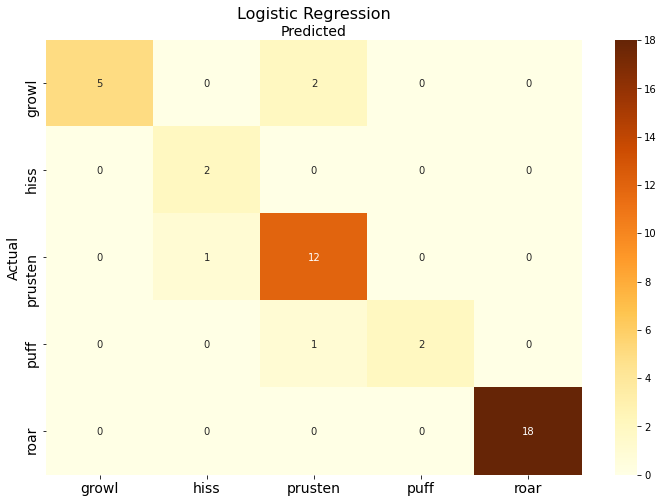

In [25]:
names_lr = sorted(list(set(np.unique(y_test1)).union(set(y_lr1))))
cnf = confusion_matrix(y_test1, y_lr1)
fig, ax = plt.subplots(figsize=(12,8))

print('Accuracy',lr1.score(X_test, y_test1))

sns.heatmap(cnf, annot=True, xticklabels=names_lr, yticklabels=names_lr,cmap= "YlOrBr")
plt.title('Logistic Regression', fontsize=16)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('Confusion Matrix for Logistic Regression Call Classification.png')
plt.show(block=False)

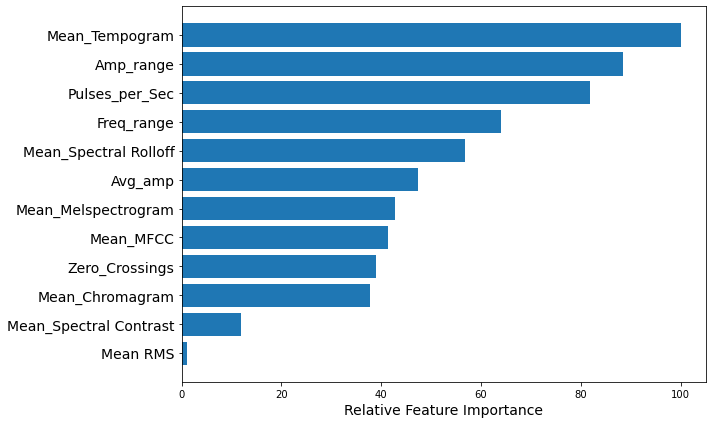

In [30]:
feature_importance = abs(lr1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=14)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   

plt.savefig('Feature Importance in Call Classification With Logistic Regression.png')

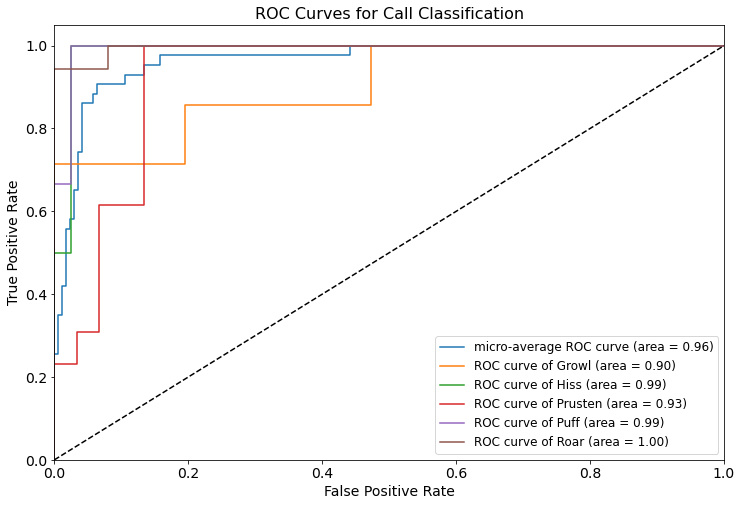

In [40]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X = df[pd.notnull(df['Call'])][['Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram','Mean RMS']]
df['Call'] = df['Call'].copy().astype('category')
df['Call'] = df['Call'].cat.codes
y = df[pd.notnull(df['Call'])]['Call']
# Binarize the output
y = label_binarize(y, classes=[1, 2, 3, 4, 5])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(LogisticRegression(solver='liblinear', multi_class='ovr',class_weight="balanced"))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

'''
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
'''

# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('ROC Curves for Call Classification', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L=plt.legend(loc="lower right", prop={'size': 12})

L.get_texts()[1].set_text('ROC curve of Growl (area = 0.90)')
L.get_texts()[2].set_text('ROC curve of Hiss (area = 0.99)')
L.get_texts()[3].set_text('ROC curve of Prusten (area = 0.93)')
L.get_texts()[4].set_text('ROC curve of Puff (area = 0.99)')
L.get_texts()[5].set_text('ROC curve of Roar (area = 1.00)')


plt.savefig('ROC Calls.png')
plt.show()



In [28]:
y_test

array([[0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0,

In [29]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')

classes = lr1.classes_

pred_df['Target'] = y_test1

for i in range(len(classes)):
    pred_df[lr1.classes_[i]] = prob_lr1[:,i]

pred_df['Predicted'] = y_lr1

pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']] #to only look at the incorrect records
#pred_df.to_csv('Mislabeled Pantherinae Species With LR.csv', index=False)
#pred_df.to_csv('Pantherinae Call Classification Data with Logistic Regression.csv', index=False)
pred_df.head(45)

,Zero_Crossings_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,Mean_MFCC_Standardized,Mean_Spectral Rolloff_Standardized,Mean_Melspectrogram_Standardized,Mean_Spectral Contrast_Standardized,Mean_Chromagram_Standardized,Mean_Tempogram_Standardized,Mean RMS_Standardized,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Target,Mew,growl,hiss,prusten,puff,roar,Predicted
580,-0.255915,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,-0.640819,Lion Puff 1,3,6263,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,0.004379,0,0.007992,puff,0.007712,0.045303,0.067211,0.553258,0.158874,0.167642,prusten
576,-0.607576,0.973968,1.701499,0.173308,0.629627,1.746737,-0.313521,0.586379,-0.682604,0.628510,-2.677252,1.852993,LG2,1,612,0.482112,0.073900,5519.928475,1078.843164,-0.418596,3140.447677,2.484556,17.529999,0.760913,0.009798,-0.009843,9,0.099134,growl,0.003897,0.187001,0.013544,0.661977,0.037962,0.095619,prusten
398,-0.610874,-0.007169,0.143983,-0.799425,-0.564073,0.713947,-1.373631,-0.149892,1.184934,1.007618,-0.196586,0.134603,CL-Prusten-7,1,559,0.241502,0.028854,2335.000000,304.000000,-3.601594,1063.935991,0.358700,20.183065,0.794575,0.154447,0.011917,2,0.036332,prusten,0.017478,0.083124,0.555577,0.295405,0.007714,0.040702,hiss
574,-0.501661,0.282277,0.372786,-0.359013,-0.082645,0.793783,-0.237297,-0.043017,-0.124365,-0.276572,-2.182932,0.347626,LG2,2,2314,0.312485,0.035471,3777.000000,616.500000,-3.355546,3289.753671,0.667282,18.323045,0.680546,0.038622,-0.001394,11,0.044117,growl,0.004218,0.038364,0.009224,0.799284,0.051169,0.097740,prusten


# Species Classification

## Splitting data

In [58]:
y_train2 = y_train.Species
y_test2 = y_test.Species

## XGBoost

In [59]:
parameters = dict(
    objective='multi:softprob',
    random_state = 42,
    max_depth=9,
    learning_rate=0.01,
    subsample=0.8,
    colsample_bytree=0.4,
    tree_method='gpu_hist')
#eval_metric='mlogloss'

clf2 = XGBClassifier(**parameters, n_estimators=1200)

In [60]:
clf2.fit(X_train, y_train2)

[22:36:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1200, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.8,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [61]:
clf2.score(X_test,y_test2)

0.9069767441860465

In [62]:
y_clf2 = clf2.predict(X_test)
prob_clf2 = clf2.predict_proba(X_test)

In [63]:
print('1. Tested Species')
print(np.unique(y_test2))
print('2. Predicted Species')
print(np.unique(y_clf2))
print('3. Not tested for but predicted')
print(set(np.unique(y_clf2))-set(np.unique(y_test2)))
print('4. Tested for but not predicted')
print(set(np.unique(y_test2))-set(np.unique(y_clf2)))

1. Tested Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
2. Predicted Species
['Clouded leopard' 'Jaguar' 'Leopard' 'Lion']
3. Not tested for but predicted
set()
4. Tested for but not predicted
set()


Accuracy 0.9069767441860465


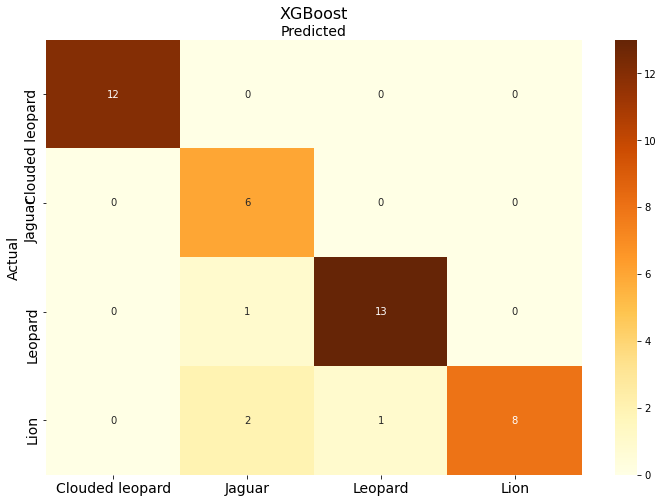

In [64]:
names = sorted(list(set(np.unique(y_test2)).union(set(y_clf2))))
cnf = confusion_matrix(y_test2, y_clf2)
fig, ax = plt.subplots(figsize=(12,8))

print('Accuracy',clf2.score(X_test, y_test2))

sns.heatmap(cnf, annot=True, xticklabels=names, yticklabels=names,cmap= "YlOrBr")
plt.title('XGBoost', fontsize=16)
ax.xaxis.set_label_position('top')
plt.ylabel('Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.savefig('Confusion Matrix for XGBoost Species Classification',bbox_inches="tight")
plt.show(block=False)


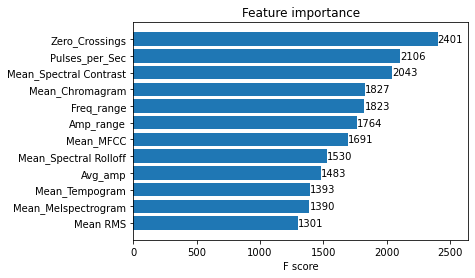

In [71]:
plot_importance(clf2, height=.8, ax=None,
    xlim=None,
    ylim=None,
    title='Feature importance',
    xlabel='F score',
    ylabel='',
    fmap='',
    importance_type='weight',
    max_num_features=None,
    grid=False)
figsize=(14,10)
plt.savefig('Feature Importance in Species Classification With XGB.png',bbox_inches="tight")

[22:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

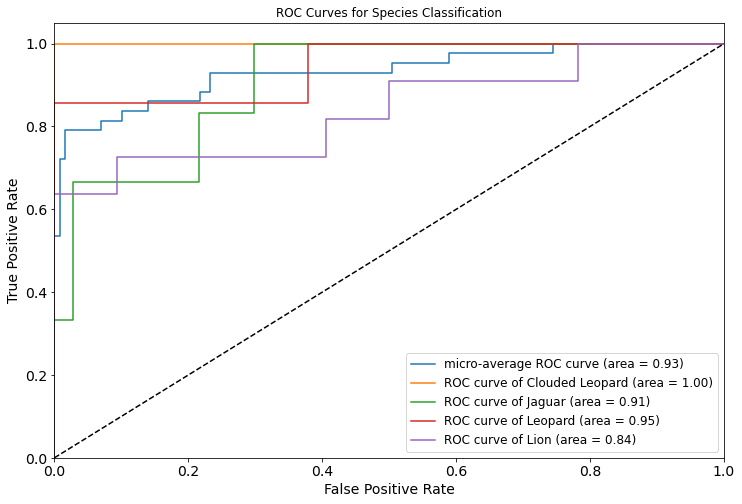

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

X = df[pd.notnull(df['Call'])][['Zero_Crossings', 'Amp_range',
       'Avg_amp', 'Freq_range', 'Pulses_per_Sec', 'Mean_MFCC',
       'Mean_Spectral Rolloff', 'Mean_Melspectrogram',
       'Mean_Spectral Contrast', 'Mean_Chromagram', 'Mean_Tempogram','Mean RMS']]
df['Species'] = df['Species'].astype('category')
df['Species'] = df['Species'].cat.codes
y = df[pd.notnull(df['Call'])]['Species']

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(XGBClassifier())
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)



# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

'''
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
'''


# Plot ROC curve
plt.figure(figsize=(12,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))


for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for Species Classification')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

L=plt.legend(loc="lower right", prop={'size': 12})


L.get_texts()[1].set_text('ROC curve of Clouded Leopard (area = 1.00)')
L.get_texts()[2].set_text('ROC curve of Jaguar (area = 0.91)')
L.get_texts()[3].set_text('ROC curve of Leopard (area = 0.95)')
L.get_texts()[4].set_text('ROC curve of Lion (area = 0.84)')


plt.savefig('ROC Species.png')
plt.show()

In [43]:
y_test

array([[0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0]])

In [44]:
pred_df = pd.DataFrame(X_test.copy())
pred_df = pred_df.join(df_raw, lsuffix='_Standardized')
classes = clf2.classes_
pred_df['Target'] = y_test2

for i in range(len(classes)):
    pred_df[clf2.classes_[i]] = prob_clf2[:,i]

pred_df['Predicted'] = y_clf2

pred_df = pred_df[pred_df['Target'] != pred_df['Predicted']]
#pred_df.to_csv('Mislabeled Pantherinae Species With RF.csv', index=False)
#pred_df.to_csv('Pantherinae Species Classification Data with XGB.csv', index=False)
pred_df.head()

,Zero_Crossings_Standardized,Amp_range_Standardized,Avg_amp_Standardized,Freq_range_Standardized,Pulses_per_Sec_Standardized,Mean_MFCC_Standardized,Mean_Spectral Rolloff_Standardized,Mean_Melspectrogram_Standardized,Mean_Spectral Contrast_Standardized,Mean_Chromagram_Standardized,Mean_Tempogram_Standardized,Mean RMS_Standardized,File Name,Duration_in_Sec,Zero_Crossings,Amp_range,Avg_amp,Freq_range,Pulses_per_Sec,Mean_MFCC,Mean_Spectral Rolloff,Mean_Melspectrogram,Mean_Spectral Contrast,Mean_Chromagram,Mean_Tempogram,Mean_Tonnetz,Partials,Mean RMS,Target,Clouded leopard,Jaguar,Leopard,Lion,Snow leopard,Predicted
580,-0.255915,-0.633903,-0.643922,0.531333,-0.018145,-0.075369,1.066828,-0.266324,-1.934559,1.589427,-1.654519,-0.640819,Lion Puff 1,3,6263,0.087805,0.006066,6692.176632,658.367249,-6.034222,5844.233214,0.022521,15.751444,0.846237,0.069434,0.004379,0,0.007992,Lion,0.037266,0.685954,0.201011,0.017937,0.057833,Jaguar
437,2.014733,-0.785102,-0.793722,-0.373237,-0.663330,-1.472496,2.109091,-0.273725,-1.587507,0.325186,1.182318,-0.796202,Leopard roaring sequence 4,7,42751,0.050725,0.001734,3730.428571,239.571429,-10.340084,7885.786974,0.001152,16.244474,0.733979,0.234851,0.003998,0,0.002313,Leopard,0.018426,0.556403,0.110686,0.238249,0.076235,Jaguar
576,-0.607576,0.973968,1.701499,0.173308,0.629627,1.746737,-0.313521,0.586379,-0.682604,0.628510,-2.677252,1.852993,LG2,1,612,0.482112,0.073900,5519.928475,1078.843164,-0.418596,3140.447677,2.484556,17.529999,0.760913,0.009798,-0.009843,9,0.099134,Lion,0.137671,0.269036,0.444180,0.080978,0.068135,Leopard
574,-0.501661,0.282277,0.372786,-0.359013,-0.082645,0.793783,-0.237297,-0.043017,-0.124365,-0.276572,-2.182932,0.347626,LG2,2,2314,0.312485,0.035471,3777.000000,616.500000,-3.355546,3289.753671,0.667282,18.323045,0.680546,0.038622,-0.001394,11,0.044117,Lion,0.036121,0.802611,0.135441,0.013551,0.012277,Jaguar
